In [1]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
%matplotlib inline

## Fetching population data from Wikipedia

In this lab we will fetch data about countries and their population from Wikipedia.

http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population has several tables for individual countries, subcontinents as well as different years. We will combine the data for all countries and all years in a single panda dataframe and visualize the change in population for different countries.

### We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

Let's start

## Fetching the Wikipedia site

In [2]:
# url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
# website_html = requests.get(url).text
with open("./List of countries by past and future population - Wikipedia.html") as f:
    website_html  = f.read()

## Parsing html data

In [3]:
#extract all tables...
import re
def extract_tables(html):
    "The functions extracts all the tables and return a list, with each item containing the html for a table."
    # YOUR CODE HERE
    x = re.findall('<table class="sortable.*?</table>', html, flags=re.DOTALL)
    #raise NotImplementedError()
    #print x 
    return x 

In [4]:
from nose.tools import assert_equal
with open("./List of countries by past and future population - Wikipedia.html") as f:
    website_html  = f.read()
    
assert_equal( len(extract_tables(website_html)), 3)
assert_equal(len(extract_tables("Test")), 0)
assert_equal(len(extract_tables(r'<table class="sortable wikitable jquery-tablesorter" style="text-align: right"><tr><th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">Country (or dependent territory)</th><th class="headerSort" tabindex="0" role="columnheader button" title="Sort ascending">1950</th></tr></table>')), 1)

In [5]:
# YOUR CODE HERE
#raise NotImplementedError()

from collections import defaultdict
import itertools 

def dictfactory():
    return defaultdict(int)

def tables_to_dict(tables):
    """ 
    Make a dictionary of dictionaries, where in outer dictionary, use country name as key,
    and in inner dictionary use year as key and population as value (as number),
    and after reading each table we will update internal dictionary so that in the end it will 
    contain data of all the years
    """
    # YOUR CODE HERE
    out = defaultdict(dictfactory)
    firsttable = True
    
    for table in tables: 
        years = re.findall('\d\d\d\d</th>', table)
        years = [int(y[:4]) for y in years]
        
        tablebodyhtml = re.findall('<tbody>.*?</tbody>', table, flags=re.DOTALL)[0]
        listings = re.findall('<tr>.*?</tr>', tablebodyhtml, flags=re.DOTALL)
        for country in listings[:-1]:
            anchors = re.findall('<a href=.*</a>', country)[0]
            cname = re.findall('>.*</a>', anchors)[0]
            cname = cname[1:-4]
            
            pops = re.findall('<td>.*?</td>', country)
            if firsttable == True:
                pops = [p for i, p in enumerate(pops) if ((i == 0) or (i%2==1))]
            else: 
                pops = [p for i, p in enumerate(pops) if (i%2==0)]
            pops = [int(p[4:-5].replace(',','')) for p in pops]
            #print pops
            #print years 
            
            for y, p in itertools.izip(years, pops):
                out[cname][y] = p
        #break
        firsttable = False 
    return out

website_tables = extract_tables(website_html)
tables_to_dict(website_tables)

defaultdict(<function __main__.dictfactory>,
            {'Afghanistan': defaultdict(int,
                         {1950: 8151,
                          1955: 8892,
                          1960: 9830,
                          1965: 10998,
                          1970: 12431,
                          1975: 14133,
                          1980: 15045,
                          1985: 13120,
                          1990: 13569,
                          1995: 19446,
                          2000: 22462,
                          2005: 26335,
                          2010: 29121,
                          2015: 32565,
                          2020: 36644,
                          2025: 41118,
                          2030: 45665,
                          2035: 50195,
                          2040: 54717,
                          2045: 59256,
                          2050: 63796}),
             'Albania': defaultdict(int,
                         {1950: 1228,
             

In [6]:
tables = extract_tables(website_html)
country_data = tables_to_dict(tables)

In [7]:
from nose.tools import assert_equal, assert_items_equal
tables = extract_tables(website_html)
country_data = tables_to_dict(tables)

assert_equal(len(country_data.keys()), 227 )
for k in country_data.keys():
    assert_items_equal(country_data[k].keys(), [1985, 2050, 1955, 2020, 1990, 1960, 2025, 1995, 1965, 2030, 2000, 1970, 2035, 2005, 1975, 2040, 2010, 1980, 2045, 1950, 2015])
    
assert_equal( sum(country_data["Pakistan"].values()) , 3268251)

## Creating a dataframe from a dictionary

In [8]:
# create dataframe named df
df = pd.DataFrame.from_dict(country_data, orient='index')
# sort based on year

df.sort(axis=1,inplace=True)

/home/muneebaadil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [9]:
df

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
Afghanistan,8151,8892,9830,10998,12431,14133,15045,13120,13569,19446,...,26335,29121,32565,36644,41118,45665,50195,54717,59256,63796
Albania,1228,1393,1624,1884,2157,2402,2672,2957,3245,3159,...,3025,2987,3030,3075,3105,3103,3063,2994,2913,2825
Algeria,8893,9842,10910,11964,13932,16141,18807,22009,25191,28322,...,32918,35950,39543,42973,45842,48149,50118,52030,53894,55445
American Samoa,20,20,21,25,28,30,33,39,48,54,...,57,56,55,54,54,53,52,51,50,50
Andorra,7,7,9,14,20,27,34,45,53,64,...,77,85,86,86,86,85,83,82,79,75
Angola,4118,4424,4798,5135,5606,6051,7206,8390,9486,11000,...,14770,17043,19626,22485,25674,29155,32910,36948,41280,45889
Anguilla,6,6,6,6,7,7,7,7,9,10,...,14,15,17,19,20,22,23,25,26,27
Antigua and Barbuda,46,52,55,60,66,69,69,65,65,69,...,82,87,93,99,104,110,114,118,121,123
Argentina,17151,18928,20617,22284,23963,26082,28370,30672,33036,35274,...,39182,41344,43432,45379,47165,48796,50273,51574,52663,53512
Armenia,1356,1566,1869,2206,2520,2835,3134,3465,3530,3131,...,3085,3072,3057,3022,2962,2884,2796,2699,2590,2469


## Plotting population of 4 countries

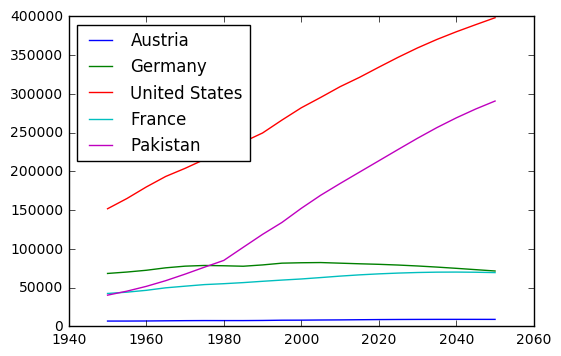

In [10]:
plotCountries = ['Austria', 'Germany', 'United States', 'France','Pakistan']

# YOUR CODE HERE
fig, ax = plt.subplots()
for c in plotCountries: 
    ax.plot(df.columns, df.ix[c], label=c)
ax.legend(loc=0)
#raise NotImplementedError()

## Plot 5 most populous countries from 2010 and 2060

/home/muneebaadil/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


China
India
United States
Indonesia
Brazil
Pakistan
Nigeria
India
China
United States
Nigeria
Indonesia
Pakistan
Brazil


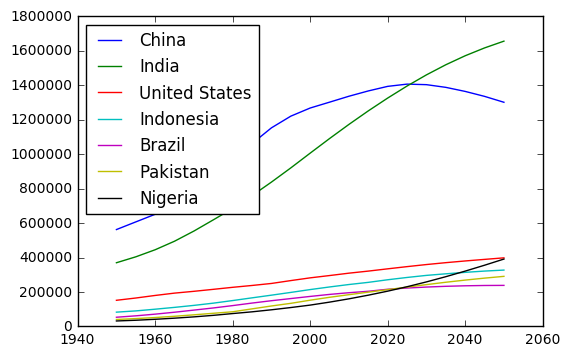

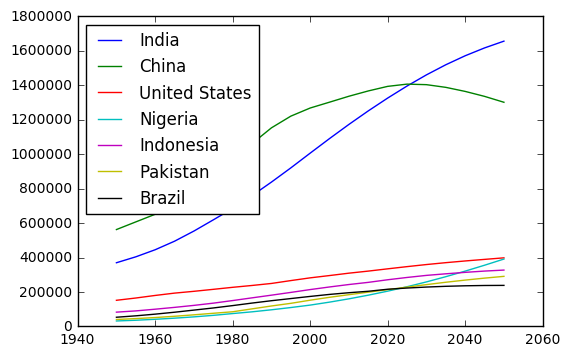

In [11]:
def plot_populous(df, year):
    # sort table depending on data value in year column
    newdf = df.sort(columns=year, ascending=False)
    for c in newdf.index[:7]:
        #print c 
        plt.plot(df.columns, newdf.ix[c], label=c)
    plt.legend(loc=0)
    # YOUR CODE HERE
    #raise NotImplementedError()
plot_populous(df, 2010)
plt.figure()
plot_populous(df, 2050)